<a href="https://colab.research.google.com/github/Anudeep003/codtech-week2/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [ ]:
# Load the data
data = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

# Remove rows with score = 3 (neutral)
data = data[data['Score'] != 3]

# Create a new 'Recommond' column: 1 = positive (score > 3), 0 = negative (score < 3)
data['Recommond'] = (data['Score'] > 3).astype(int)

# Now you can use value_counts on Recommond
print(data['Recommond'].value_counts())


Recommond
1    443777
0     82037
Name: count, dtype: int64


In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data.sample(50000)  # or smaller


In [ ]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Recommond
332407,332408,B001XUM9B4,A2SS44O400KIZ7,carol,8,9,5,1293148800,what a surprise,I thought I was taking a chance on this item. ...,1
276179,276180,B001AWBL82,A353ESPOB5E51Z,Justin Pyatt,1,1,5,1328572800,At least you can find King B in some form.,I miss the King B ripple style and the regular...,1
220828,220829,B001CCU848,A1JBUB9TES0PTV,SandyLou,0,0,5,1255046400,"Really, really good","I have a Juan Valdez one-cup brewer, and they ...",1
364445,364446,B000PDY3HI,AKOMCT01A2S0I,Jason,0,0,5,1342828800,Pretty Good Flavor,This stuff is great. I use it in my whirley po...,1
68835,68836,B000H7ELTM,A1ZSF5CJ0A4CIO,Fancy Trimmins,3,3,5,1250726400,"Excellent product, plump, flavorful, free of p...",I've been hooked on Traverse dried cranberries...,1
...,...,...,...,...,...,...,...,...,...,...,...
449796,449797,B006H33NL2,A1MVSAVABMUXOQ,Andi,0,0,5,1331596800,"Good, long-lasting chew",My puppy really loves these antler chews. It ...,1
159407,159408,B0006MU8QS,A2MTAFJI8FIKN6,troncalli01,1,1,4,1286841600,"Greasy, but long lasting indeed.",The only con I have with this bone is that it'...,1
16854,16855,B001LGGH40,A11KZ906QD08C5,"BILL MCLEAN ""Only My Opinion - Compare with O...",0,1,5,1237248000,A new taste experience,I only received one can for testing instead of...,1
501416,501417,B0039OVW74,AYREMZ3JCGY63,A. Bray,2,4,5,1294099200,Great healthy treat. Sinfully Delicious!,"These may not have the 'berry' inside of them,...",1


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=3000)

In [ ]:
summary=cv.fit_transform(data['Summary']).toarray()

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
Summary_train,Summary_test,Recommond_train,Recommond_test=train_test_split(summary,data['Recommond'],test_size=0.2)

In [ ]:
Summary_train,Summary_test,Recommond_train,Recommond_test=train_test_split(summary,data['Recommond'],test_size=0.2)

In [ ]:
model.fit(Summary_train,Recommond_train)


LogisticRegression()

In [ ]:
predict = model.predict(Summary_test)

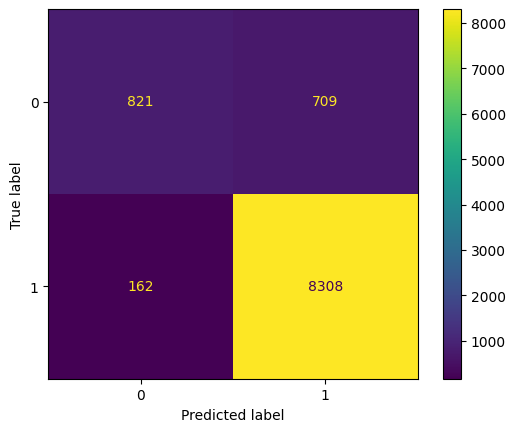

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Recommond_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [ ]:
def sentiment_analysis(text):
  text_vectorized = cv.transform([text]).toarray()
  prediction = model.predict(text_vectorized)[0]
  outcome = 'Good Service' if prediction == 1 else 'Bad Service'
  return outcome

In [ ]:
sentiment_analysis('''I recommend this product because it exceeded my expectations in both taste and quality.I recommend this product because the ingredients are natural and clean.I recommend this product because the portion size is generous.I recommend this product because the aroma alone is worth buying it for.I recommend this product because it makes for a perfect gift.I recommend this product because my kids absolutely love it.I recommend this product because the texture is just right.I recommend this product because it’s better than what you find in stores.I recommend this product because I’ve bought it several times now.I recommend this product because it shipped quickly and safely.I recommend this product because I can’t stop snacking on it.I recommend this product because it goes great with coffee or tea.I recommend this product because it's a lifesaver for busy mornings.I recommend this product because it reminds me of something homemade.I recommend this product because it suits my dietary preferences.I recommend this product because the taste lingers in the best way.I recommend this product because it satisfies my sweet tooth without guilt.I recommend this product because I look forward to enjoying it every day.I recommend this product because the quality hasn't dropped even after multiple orders.I recommend this product because it’s perfect for any occasion.I recommend this product because the packaging is also eco-friendly.''')


'Good Service'

In [ ]:
sentiment_analysis('''I do not recommend this product because the flavor was bland and disappointing.

I do not recommend this product because it arrived stale and poorly packaged.

I do not recommend this product because the texture was off-putting.

I do not recommend this product because it didn't taste fresh at all.

I do not recommend this product because it had a weird aftertaste.

I do not recommend this product because it was a waste of money.

I do not recommend this product because the portion size was too small.

I do not recommend this product because it caused stomach discomfort.

I do not recommend this product because the quality was not what I expected.

I do not recommend this product because it arrived in bad condition.

I do not recommend this product because I threw most of it away.

I do not recommend this product because I’ve had much better alternatives.

I do not recommend this product because it was overpriced for what I got.

I do not recommend this product because the ingredients didn’t seem fresh.

I do not recommend this product because the taste was too artificial.''')

'Bad Service'